In [ ]:
#| default_exp fft
#| export
from audio_snippets.core import *
import seaborn as sns
from scipy.fft import fft, fftfreq
from torch_snippets import store_attr, np, plt, pd, show, inspect

class FFT:
    def __init__(self, audio, step=0.1, window=None):
        window = step if window is None else window
        store_attr()
        o = []
        sz = int(audio.Fs*window)
        self.timestamps = []
        for start in np.arange(0, audio.size, step):
            clip = audio[start:start+window]
            if len(clip) != sz:
                clip.audio = np.r_[clip.audio, np.zeros(sz - len(clip))]
            x = fft(clip.audio)
            x = (2/sz * np.abs(x[:sz//2]))
            o.append(x)
            self.timestamps.append(start) # 
        self.fft = np.log(np.stack(o[:-1]) + 1e-50)[:, :sz//2]
        self.fft = (self.fft - self.fft.mean()) / self.fft.std()
        self.freqs = fftfreq(sz, 1/audio.Fs)[:sz//2]
        # self.freqs = [f'{i:.0f} Hz' for i in fftfreq(sz, 1/audio.Fs)[:sz//2]]

    def plot(self, df=None, sz=None):
        df = df if df is not None else self.df
        Fs, T = df.shape
        fig, ax = plt.subplots(figsize=sz if sz else (max(1, T//5),5))
        return sns.heatmap(df, ax=ax)
    
    @property
    def df(self):
        input = self.fft
        df = pd.DataFrame(
            input.T,
            index=[f'{i:.0f} Hz' for i in self.freqs],
            columns=[f'{i+self.step:.3f} s' for i in self.timestamps[:len(input)]]
        )
        return df
        

<AxesSubplot:>

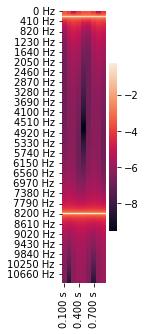

In [ ]:
T = 1
x = Sound.sine(216, T) + Sound.sine(8196, T)
xf = FFT(x, step=0.1)
xf.plot()

,0.100 s,0.200 s,0.300 s,0.400 s,0.500 s,0.600 s,0.700 s,0.800 s,0.900 s,1.000 s,...,19.000 s,19.100 s,19.200 s,19.300 s,19.400 s,19.500 s,19.600 s,19.700 s,19.800 s,19.900 s
0 Hz,-36.663037,-35.427725,-35.752821,-37.212147,-9.322144,-36.099551,-35.042076,-38.084597,-36.231094,-35.442119,...,-33.383483,-33.255068,-7.860478,-6.816078,-6.768580,-7.658631,-33.881953,-7.860478,-6.816078,-6.768580
1 Hz,-36.898237,-35.809980,-36.303271,-36.739219,-9.322144,-35.581196,-35.211823,-35.145731,-35.543723,-36.276245,...,-33.839578,-33.690030,-7.703557,-7.023931,-7.293041,-7.200043,-6.691680,-7.102760,-7.330134,-6.979315
2 Hz,-37.104237,-35.735108,-36.512958,-35.638721,-9.322144,-34.547664,-35.122390,-36.324803,-35.651416,-35.132563,...,-33.837775,-33.809679,-7.436241,-7.917453,-7.917453,-7.436241,-33.487478,-7.436241,-7.917453,-7.917453
3 Hz,-36.558050,-36.602947,-36.560008,-37.406164,-9.322144,-34.712111,-34.373208,-34.388727,-34.564995,-34.698446,...,-32.676337,-32.810668,-7.228632,-7.907695,-6.819044,-7.426483,-6.691649,-7.426483,-6.866016,-7.907695
4 Hz,-36.364752,-35.625429,-36.607539,-36.502814,-9.322144,-34.798718,-34.218536,-33.955058,-33.960589,-33.815173,...,-33.982578,-33.923739,-7.105817,-7.021213,-6.976826,-7.203765,-35.013932,-7.105817,-7.021213,-6.976826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11020 Hz,-36.936605,-36.124889,-36.625517,-34.616039,-9.322144,-34.837870,-35.600439,-35.840070,-35.468562,-34.771948,...,-33.065427,-33.160776,-9.999517,-10.329595,-10.787236,-10.105805,-34.329215,-9.999517,-10.329595,-10.787236
11021 Hz,-35.845240,-35.814855,-35.618400,-34.937123,-9.322144,-34.805272,-36.103115,-35.224281,-35.679770,-34.766030,...,-33.939551,-33.468580,-10.012629,-10.397002,-10.588679,-9.967947,-11.924158,-10.139823,-10.465936,-10.672871
11022 Hz,-35.643352,-35.887627,-35.901575,-34.557477,-9.322144,-34.908923,-34.453448,-34.625211,-34.288123,-34.833701,...,-33.453226,-33.196618,-10.048618,-10.529830,-10.529830,-10.048618,-33.461214,-10.048618,-10.529830,-10.529830
11023 Hz,-35.388930,-35.503993,-35.880017,-34.505502,-9.322144,-35.606634,-34.706554,-34.821736,-35.161646,-34.474998,...,-33.867054,-34.151254,-10.096991,-10.529778,-10.752927,-10.048566,-11.924158,-10.048566,-10.347337,-10.529778


<AxesSubplot:>

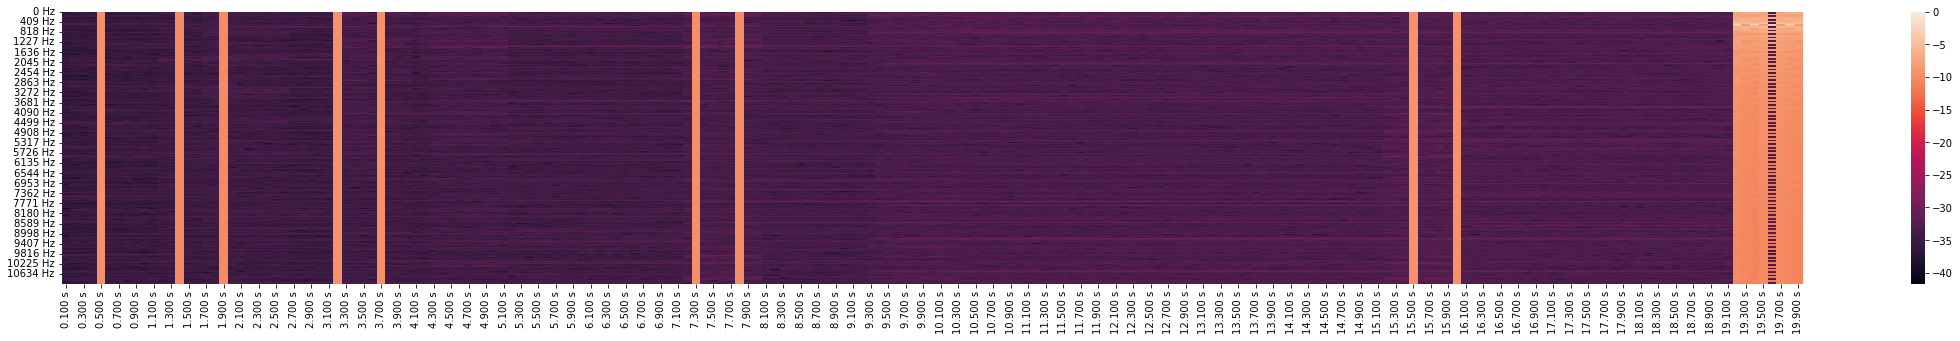

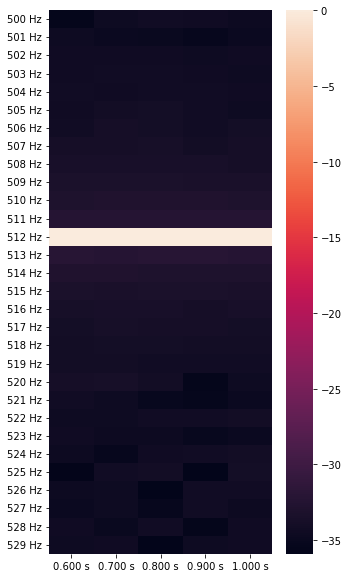

In [ ]:
x = Sound.sine(512, 20)

f = FFT(x, step=0.1, window=1)
f.plot() # heatmap has a hardtime showing the spike
show(f.df)
f.plot(df=f.df.iloc[500:530, 5:10], sz=(5, 10)) # zoom in